# Task 1: Data Collection and Preparation

In [28]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

In [29]:
Charging_set = pd.read_csv('charging_sessions_preprocessed.csv', parse_dates=['connectionTime', 'disconnectTime', 'doneChargingTime'])

## Calculating the KPIs
#### Now we calculate the occupation and utilization rate of each site. The dataframe hourly_occupation_df is a list of timestamps for each hour starting at the first charginsession recorded and ending when the last chargingsession is recorded. This will give us the number of occupied and utilized stations for each hourly timestamp over the period of time the sites are operated.

#### KPI 1: Occupation
The occupation describes the time where a car is occupiying station, whether it is currently charging or not.
#### KPI 2: Utilization
The utilization describes the time where a car is connected to a station and charging. 

### Preperation of KPI 1 and 2 by constructing the KPI_hourly_df

In [30]:
## generate a df for calculating the occupation time

start_timestamp = pd.to_datetime("2018-04-25 00:00:00+00:00")
end_timestamp = pd.to_datetime("2021-09-14 16:00:00+00:00")

# Generate a range of hourly timestamps
hourly_timestamps = pd.date_range(start=start_timestamp, end=end_timestamp, freq='H')

# Create the DataFrame
KPI_hourly_df = pd.DataFrame({
    'time_id': range(1, len(hourly_timestamps) + 1),
    'hourly_timestamp': hourly_timestamps
})

# Display the DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp
0            1 2018-04-25 00:00:00+00:00
1            2 2018-04-25 01:00:00+00:00
2            3 2018-04-25 02:00:00+00:00
3            4 2018-04-25 03:00:00+00:00
4            5 2018-04-25 04:00:00+00:00
...        ...                       ...
29724    29725 2021-09-14 12:00:00+00:00
29725    29726 2021-09-14 13:00:00+00:00
29726    29727 2021-09-14 14:00:00+00:00
29727    29728 2021-09-14 15:00:00+00:00
29728    29729 2021-09-14 16:00:00+00:00

[29729 rows x 2 columns]


#### Counting how many stations are occupied or utilized at each timestamp

In [31]:
# Convert connectionTime and disconnectTime to datetime objects with the same timezone
Charging_set['connectionTime'] = Charging_set['connectionTime'].apply(lambda x: pd.to_datetime(x))
Charging_set['disconnectTime'] = Charging_set['disconnectTime'].apply(lambda x: pd.to_datetime(x))
Charging_set['doneChargingTime'] = Charging_set['doneChargingTime'].apply(lambda x: pd.to_datetime(x))

# Initialize a list to store the number of sessions for each timestamp
sessions_count_site1_occupation = []
sessions_count_site2_occupation = []

# Iterate through each timestamp in hourly_timestamp
for timestamp in KPI_hourly_df['hourly_timestamp']:
    # Filter sessions where the timestamp is within the connectionTime and disconnectTime range
    sessions_site1_occupation = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['disconnectTime'] > timestamp) &
        (Charging_set['siteID'] == 1)
    ]
    sessions_site2_occupation = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['disconnectTime'] > timestamp) &
        (Charging_set['siteID'] == 2)
    ]
    # Count the number of sessions for each site
    sessions_count_site1_occupation.append(len(sessions_site1_occupation))
    sessions_count_site2_occupation.append(len(sessions_site2_occupation))

# Add the sessions count to the DataFrame
KPI_hourly_df['sessions_count_site1_occupation'] = sessions_count_site1_occupation
KPI_hourly_df['sessions_count_site2_occupation'] = sessions_count_site2_occupation



# Display the updated DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp  sessions_count_site1_occupation  \
0            1 2018-04-25 00:00:00+00:00                                0   
1            2 2018-04-25 01:00:00+00:00                                0   
2            3 2018-04-25 02:00:00+00:00                                0   
3            4 2018-04-25 03:00:00+00:00                                0   
4            5 2018-04-25 04:00:00+00:00                                0   
...        ...                       ...                              ...   
29724    29725 2021-09-14 12:00:00+00:00                                1   
29725    29726 2021-09-14 13:00:00+00:00                                1   
29726    29727 2021-09-14 14:00:00+00:00                                1   
29727    29728 2021-09-14 15:00:00+00:00                                0   
29728    29729 2021-09-14 16:00:00+00:00                                0   

       sessions_count_site2_occupation  
0                                 

In [32]:
# Initialize a list to store the number of sessions for each timestamp
sessions_count_site1_utilization = []
sessions_count_site2_utilization = []

# Iterate through each timestamp in hourly_timestamp
for timestamp in KPI_hourly_df['hourly_timestamp']:
    # Filter sessions where the timestamp is within the connectionTime and disconnectTime range
    sessions_site1_utilization = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['doneChargingTime'] > timestamp) &
        (Charging_set['siteID'] == 1)
    ]
    sessions_site2_utilization = Charging_set[
        (Charging_set['connectionTime'] < timestamp) &
        (Charging_set['doneChargingTime'] > timestamp) &
        (Charging_set['siteID'] == 2)
    ]
    # Count the number of sessions for each site
    sessions_count_site1_utilization.append(len(sessions_site1_utilization))
    sessions_count_site2_utilization.append(len(sessions_site2_utilization))

# Add the sessions count to the df DataFrame
KPI_hourly_df['sessions_count_site1_utilization'] = sessions_count_site1_utilization
KPI_hourly_df['sessions_count_site2_utilization'] = sessions_count_site2_utilization

# Display the updated DataFrame
print(KPI_hourly_df)

       time_id          hourly_timestamp  sessions_count_site1_occupation  \
0            1 2018-04-25 00:00:00+00:00                                0   
1            2 2018-04-25 01:00:00+00:00                                0   
2            3 2018-04-25 02:00:00+00:00                                0   
3            4 2018-04-25 03:00:00+00:00                                0   
4            5 2018-04-25 04:00:00+00:00                                0   
...        ...                       ...                              ...   
29724    29725 2021-09-14 12:00:00+00:00                                1   
29725    29726 2021-09-14 13:00:00+00:00                                1   
29726    29727 2021-09-14 14:00:00+00:00                                1   
29727    29728 2021-09-14 15:00:00+00:00                                0   
29728    29729 2021-09-14 16:00:00+00:00                                0   

       sessions_count_site2_occupation  sessions_count_site1_utilization  \

### Calculation Occupation Rate and Utilization Rate
#### Now we will devide the number of occupied/utilized stations with the total number of stations of each site. This will give us a rate for the occupation and utilization.

#### Here we will use the occupation and utilization rates calculated in the section before for validation. We strongly assume, that not each station is available over the whole period each site operates. However, in this calculation we devide each houe of the sites operation by all sites. We accept the difference, to reduce the complexity of the calculation and make it more understandable. We can accept this, by adhering to the validation previouly calculated, where only a small difference in utilization and occupation can be observed.

In [33]:
total_number_stations_sites = Charging_set.groupby(['siteID'])['stationID'].nunique()
print(total_number_stations_sites)


siteID
1    52
2    54
Name: stationID, dtype: int64


In [34]:
# we add two features in hourly_occupation_df that describe the hourly occupation rate per site
KPI_hourly_df['hourly_occupation_site1'] = KPI_hourly_df['sessions_count_site1_occupation'] / total_number_stations_sites.loc[1]
KPI_hourly_df['hourly_occupation_site2'] = KPI_hourly_df['sessions_count_site2_occupation'] / total_number_stations_sites.loc[2]
KPI_hourly_df['hourly_utilization_site1'] = KPI_hourly_df['sessions_count_site1_utilization'] / total_number_stations_sites.loc[1]
KPI_hourly_df['hourly_utilization_site2'] = KPI_hourly_df['sessions_count_site2_utilization'] / total_number_stations_sites.loc[2]

In [35]:
# Create new features for occupation calculation
KPI_hourly_df['date'] = KPI_hourly_df['hourly_timestamp'].dt.date
KPI_hourly_df['month'] = KPI_hourly_df['hourly_timestamp'].dt.month
KPI_hourly_df['year'] = KPI_hourly_df['hourly_timestamp'].dt.year

In [36]:
## Now we can make the actual occupation and performance calculations - This can be used to verify the rates with the occupation and
## utilization rates calculated before

## 2. occupationrate of each site and both sites grouped by whole time, year, month, day, hour

occupation_rate_site1_wholetime = KPI_hourly_df['hourly_occupation_site1'].mean()
occupation_rate_site2_wholetime = KPI_hourly_df['hourly_occupation_site2'].mean()
occupation_rate_wholetime = (occupation_rate_site1_wholetime + occupation_rate_site2_wholetime) /2
print("The occupation rate of site 1 over the whole period of time is:")
print(occupation_rate_site1_wholetime)
print("The occupation rate of site 2 over the whole period of time is:")
print(occupation_rate_site2_wholetime)
print("The occupation rate of both sites over the whole period of time is:")
print(occupation_rate_wholetime)

The occupation rate of site 1 over the whole period of time is:
0.1405769295456187
The occupation rate of site 2 over the whole period of time is:
0.10695193494818572
The occupation rate of both sites over the whole period of time is:
0.12376443224690221


## The main finding for KPI 1 and 2 visualized

First the hourly Occupation rate is visualized for each site.

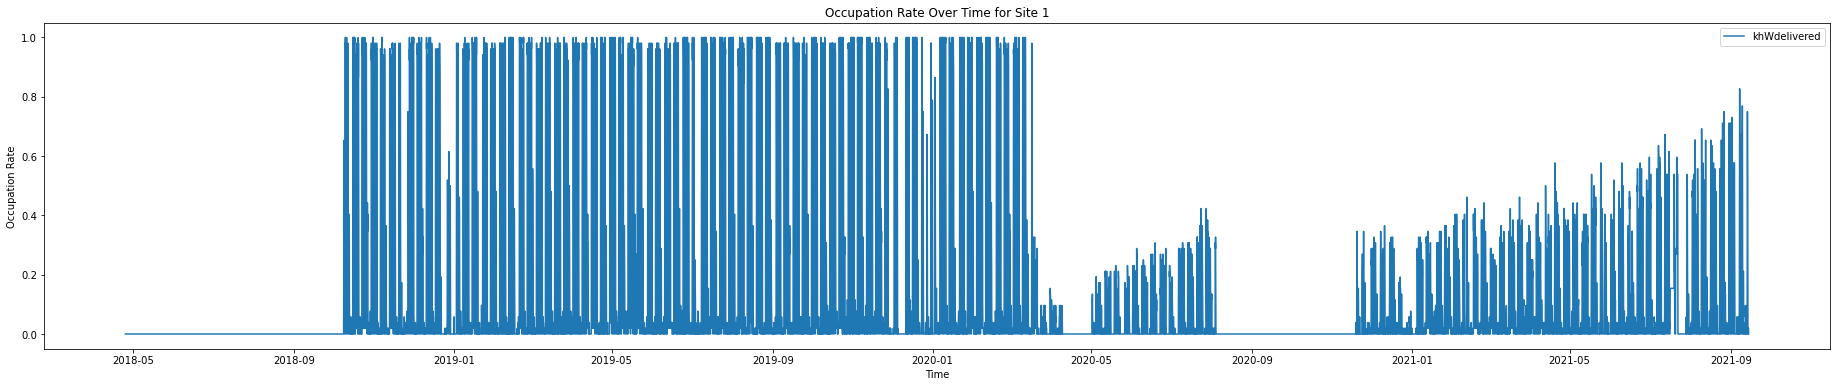

In [37]:

plt.figure(figsize=(32, 6))


plt.plot(KPI_hourly_df['hourly_timestamp'], KPI_hourly_df['hourly_occupation_site1'], label='khWdelivered')

plt.xlabel('Time')
plt.ylabel('Occupation Rate')
plt.title('Occupation Rate Over Time for Site 1')
plt.legend()


plt.show()

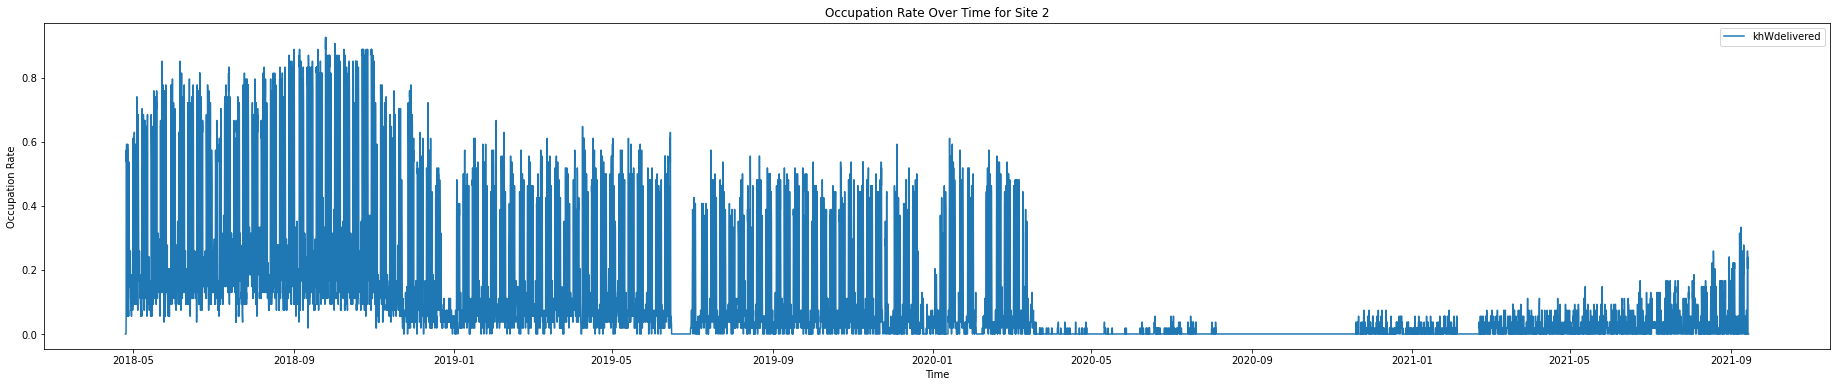

In [38]:

plt.figure(figsize=(32, 6))


plt.plot(KPI_hourly_df['hourly_timestamp'], KPI_hourly_df['hourly_occupation_site2'], label='khWdelivered')


plt.xlabel('Time')
plt.ylabel('Occupation Rate')
plt.title('Occupation Rate Over Time for Site 2')
plt.legend()


plt.show()

The hourly utilization rate for each site over whole time

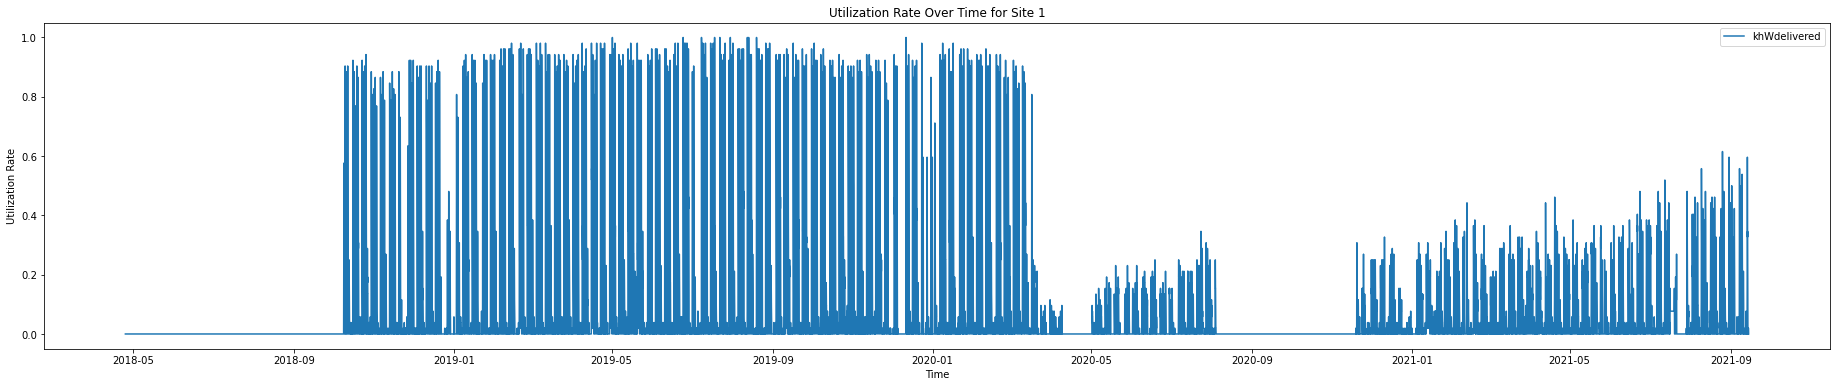

In [39]:
plt.figure(figsize=(32, 6))


plt.plot(KPI_hourly_df['hourly_timestamp'], KPI_hourly_df['hourly_utilization_site1'], label='khWdelivered')

plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.title('Utilization Rate Over Time for Site 1')
plt.legend()


plt.show()

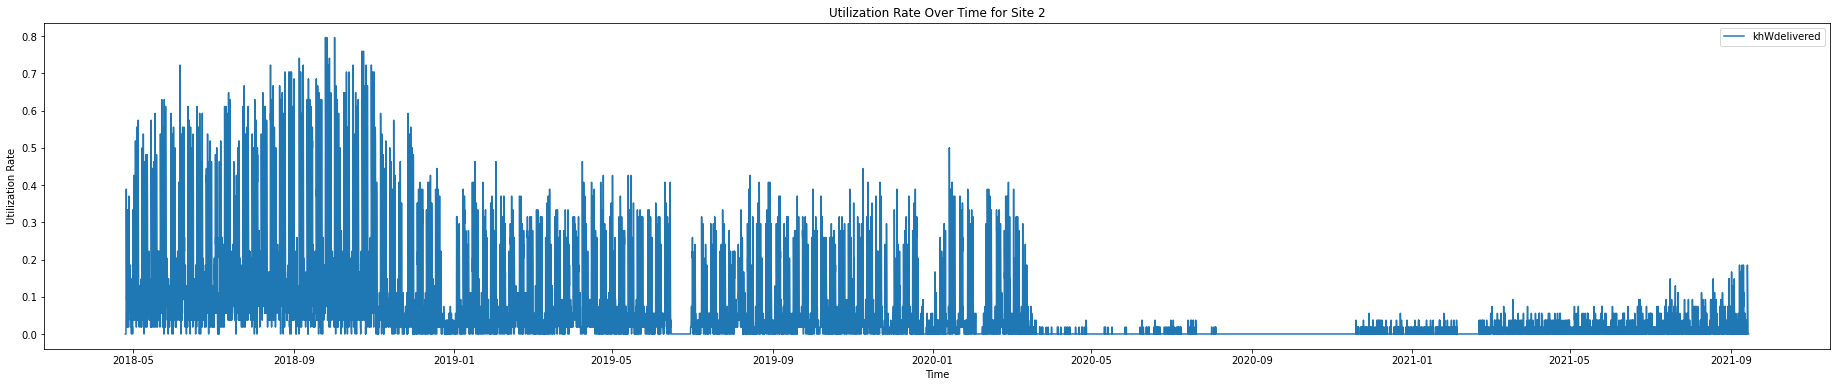

In [40]:
plt.figure(figsize=(32, 6))

plt.plot(KPI_hourly_df['hourly_timestamp'], KPI_hourly_df['hourly_utilization_site2'], label='khWdelivered')

plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.title('Utilization Rate Over Time for Site 2')
plt.legend()

plt.show()

Mean of Utilization and Occupation for each site in comparision for seeing trends and patterns.

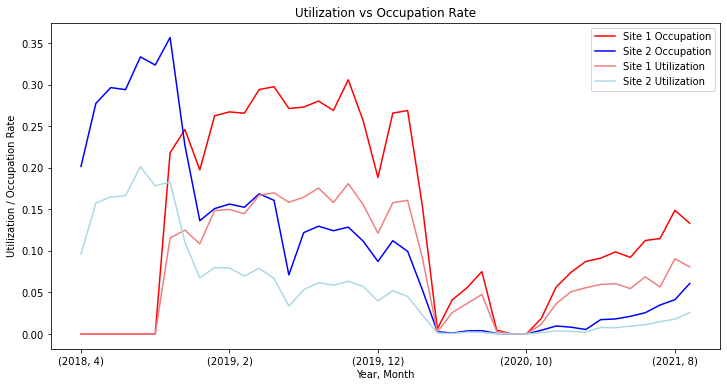

In [41]:
import matplotlib.pyplot as plt

monthly_avg_occupation_site1 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_occupation_site1'].mean()
monthly_avg_occupation_site2 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_occupation_site2'].mean()
monthly_avg_utilization_site1 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_utilization_site1'].mean()
monthly_avg_utilization_site2 = KPI_hourly_df.groupby([KPI_hourly_df['year'], KPI_hourly_df['month']])['hourly_utilization_site2'].mean()

plt.figure(figsize=(12, 6))

monthly_avg_occupation_site1.plot(color='red', label='Site 1 Occupation')
monthly_avg_occupation_site2.plot(color='blue', label='Site 2 Occupation')
monthly_avg_utilization_site1.plot(color='lightcoral', label='Site 1 Utilization')
monthly_avg_utilization_site2.plot(color='lightblue', label='Site 2 Utilization')

plt.xlabel('Year, Month')
plt.ylabel('Utilization / Occupation Rate')
plt.title('Utilization vs Occupation Rate')

plt.legend()
plt.show()


Mean Utilization and Occupation for both sites accumulated

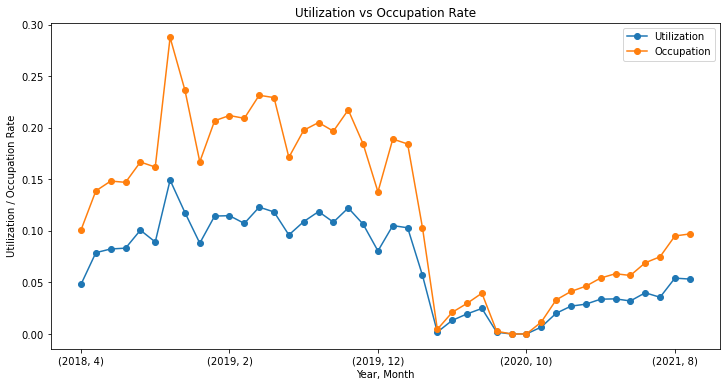

In [42]:
plt.figure(figsize=(12, 6))

monthly_avg_utilization = (monthly_avg_utilization_site2 + monthly_avg_utilization_site1) /2
monthly_avg_occupation = (monthly_avg_occupation_site2 + monthly_avg_occupation_site1) /2

monthly_avg_utilization.plot(marker= 'o', label = 'Utilization')
monthly_avg_occupation.plot(marker= 'o', label = 'Occupation')

plt.xlabel('Year, Month')
plt.ylabel('Utilization / Occupation Rate')
plt.title('Utilization vs Occupation Rate')


plt.legend()

plt.show()

#### This graph can show the daily and hourly occupation of for each site for any given day.

### You can observe the occupation and utilization for any day. Just select the specific day in "specified timestamp"

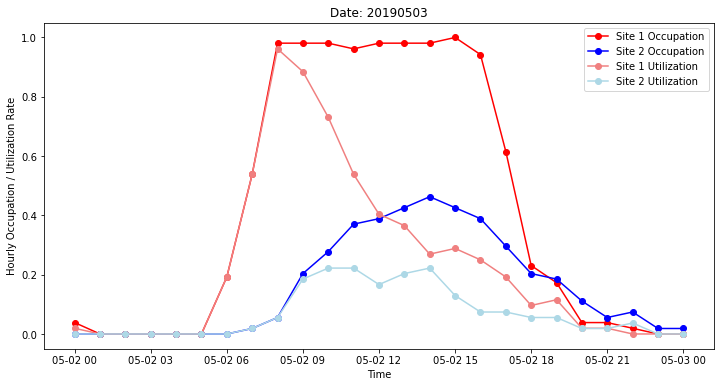

In [43]:
from datetime import datetime, timedelta, timezone
import pytz
# format timestamp
KPI_hourly_df['hourly_timestamp'] = KPI_hourly_df['hourly_timestamp'].dt.tz_convert(pytz.timezone('America/Los_Angeles'))
# select time


specified_timestamp = pd.to_datetime('2019-05-03 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the last 24 hours from the specified timestamp
last_24_hours_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= specified_timestamp - timedelta(hours=24)) &
    (KPI_hourly_df['hourly_timestamp'] <= specified_timestamp)
]

year = specified_timestamp.strftime("%Y")
month = specified_timestamp.strftime("%m")
day = specified_timestamp.strftime("%d")

plt.figure(figsize=(12, 6))

plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_occupation_site1'], marker='o', color='red', label='Site 1 Occupation')
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_occupation_site2'], marker='o', color='blue', label='Site 2 Occupation')
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_utilization_site1'], marker='o', color='lightcoral', label='Site 1 Utilization')
plt.plot(last_24_hours_df['hourly_timestamp'], last_24_hours_df['hourly_utilization_site2'], marker='o', color='lightblue', label='Site 2 Utilization')


plt.xlabel('Time')
plt.ylabel('Hourly Occupation / Utilization Rate')
plt.title('Date: ' + year + month + day )


plt.legend()


plt.show()


#### This graph shows the weekly occupation rate from any given moment

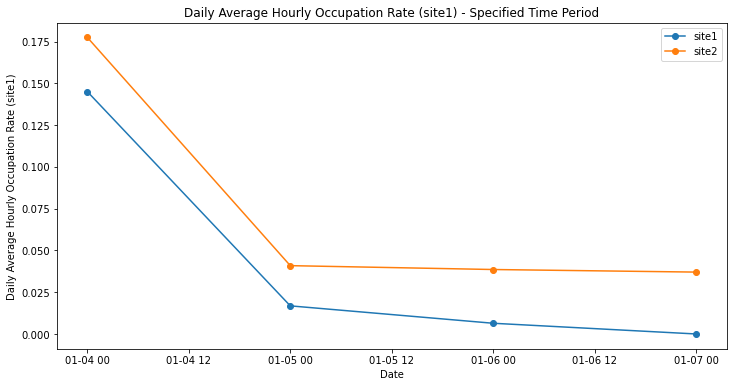

In [44]:

# Specify the time period
start_date = pd.to_datetime('2019-01-04 00:00:00').tz_localize('America/Los_Angeles')
end_date = pd.to_datetime('2019-01-07 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the specified time period
specified_period_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= start_date) &
    (KPI_hourly_df['hourly_timestamp'] <= end_date)
]
plt.figure(figsize=(12, 6))


daily_avg_occupation_site1 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_occupation_site1'].mean()
daily_avg_occupation_site2 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_occupation_site2'].mean()

daily_avg_occupation_site1.plot(marker='o', label = 'site1')
daily_avg_occupation_site2.plot(marker='o', label = 'site2')



plt.xlabel('Date')
plt.ylabel('Daily Average Hourly Occupation Rate (site1)')
plt.title('Daily Average Hourly Occupation Rate (site1) - Specified Time Period')

plt.legend()

plt.show()

#### Shows the utilization rate of each site of a specified timeframe

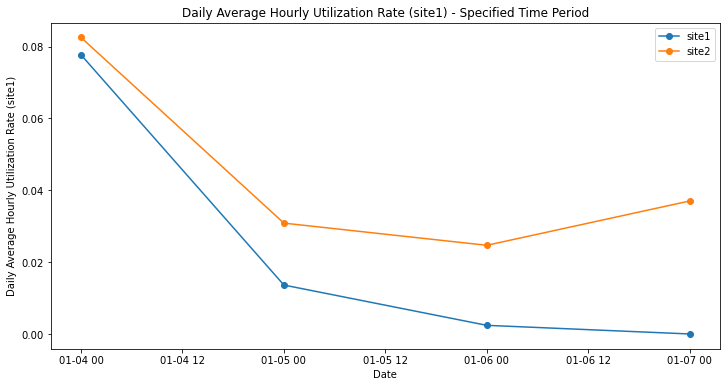

In [45]:
# specify the time period
start_date = pd.to_datetime('2019-01-04 00:00:00').tz_localize('America/Los_Angeles')
end_date = pd.to_datetime('2019-01-07 00:00:00').tz_localize('America/Los_Angeles')

# Filter the DataFrame for the specified time period
specified_period_df = KPI_hourly_df[
    (KPI_hourly_df['hourly_timestamp'] >= start_date) &
    (KPI_hourly_df['hourly_timestamp'] <= end_date)
]
plt.figure(figsize=(12, 6))

daily_avg_utilization_site1 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_utilization_site1'].mean()
daily_avg_utilization_site2 = specified_period_df.groupby(specified_period_df['hourly_timestamp'].dt.date)['hourly_utilization_site2'].mean()


daily_avg_utilization_site1.plot(marker='o', label = 'site1')
daily_avg_utilization_site2.plot(marker='o', label = 'site2')

plt.xlabel('Date')
plt.ylabel('Daily Average Hourly Utilization Rate (site1)')
plt.title('Daily Average Hourly Utilization Rate (site1) - Specified Time Period')


plt.legend()
plt.show()

## KPI 3: KhW delivered 

In [46]:
# initilize df for calculating KPI 3
selected_columns = ['id', 'connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered', 'siteID', 'stationID']
KPI_KhW_delivered = Charging_set[selected_columns].copy()

In [47]:
#timedelta
KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime'])
KPI_KhW_delivered['doneChargingTime'] = pd.to_datetime(KPI_KhW_delivered['doneChargingTime'])
# Calculate the time difference
KPI_KhW_delivered['chargingTime'] = KPI_KhW_delivered['doneChargingTime'] - KPI_KhW_delivered['connectionTime']
KPI_KhW_delivered['chargingTime_seconds'] = KPI_KhW_delivered['chargingTime'].dt.total_seconds()
KPI_KhW_delivered['khWDelivered per hour'] = KPI_KhW_delivered['kWhDelivered'] / KPI_KhW_delivered['chargingTime_seconds'] * 3600
selected_columns1  = ['time_id', 'hourly_timestamp', 'date', 'month', 'year']
selected_columns2 = ['connectionTime', 'kWhDelivered', 'siteID', 'chargingTime', 'khWDelivered per hour']
KPI_khW_timestamp = KPI_hourly_df[selected_columns1].copy()
KPI_KhW_delivered = KPI_KhW_delivered[selected_columns2].copy()

KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime'])
# Convert the 'chargingTime' column to timedelta format
KPI_KhW_delivered['chargingTime'] = pd.to_timedelta(KPI_KhW_delivered['chargingTime'])
# Add the charging time to the connection time to get the end time
KPI_KhW_delivered['endTime'] = KPI_KhW_delivered['connectionTime'] + KPI_KhW_delivered['chargingTime']

#this code generates how much kWh was charged per hour for each session. This will be used to calculate the hourly kWh later



 #### This will create the df KPI_khW_timestamp and fill it with data for how much kWh was delivered during each hour

In [48]:
from pytz import timezone

la_timezone = timezone('America/Los_Angeles')
KPI_KhW_delivered['connectionTime'] = pd.to_datetime(KPI_KhW_delivered['connectionTime']).dt.tz_convert(la_timezone)
KPI_KhW_delivered['endTime'] = pd.to_datetime(KPI_KhW_delivered['endTime']).dt.tz_convert(la_timezone)
KPI_khW_timestamp['hourly_timestamp'] = pd.to_datetime(KPI_khW_timestamp['hourly_timestamp']).dt.tz_convert(la_timezone)

KPI_khW_timestamp['khWdelivered'] = 0.0

KPI_khW_timestamp_both_sites = KPI_khW_timestamp.copy()
# Iterate through each row in KPI_KhW_delivered
for index, row in KPI_KhW_delivered.iterrows():
    start_time = row['connectionTime']
    end_time = row['endTime']
    khW_delivered = row['kWhDelivered']

    # Filter rows in KPI_khW_timestamp within the charging period
    mask = (KPI_khW_timestamp_both_sites['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_both_sites['hourly_timestamp'] <= end_time)

    # Calculate the proportion of charging time for each row
    hourly_timestamps = KPI_khW_timestamp_both_sites.loc[mask, 'hourly_timestamp']
    elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

    # For the last row in the mask, subtract endTime and last hourly_timestamp
    if not elapsed_time.empty:
        elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()
    # Calculate the proportion based on elapsed time
    proportion = elapsed_time / row['chargingTime'].total_seconds()

    # Check if the sum of proportions is not equal to 1
    if abs(proportion.sum() - 1.0) > 1e-10:
        print(f"Warning: Sum of proportions is not equal to 1 for row {index}. Sum: {proportion.sum()}")
        print("Details:")
        print(f"   Elapsed Time: {elapsed_time}")
        print(f"   Charging Time: {row['chargingTime'].total_seconds()}")
        print(f"   Proportion: {proportion}")

    # Distribute khWdelivered based on the proportion
    KPI_khW_timestamp_both_sites.loc[mask, 'khWdelivered'] += proportion * khW_delivered


print(KPI_khW_timestamp_both_sites)

/Users/imkeschwenke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-48-1a1555717837>:26: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 557.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 2719.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1675.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1743.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1699.0
   Proportion: Series([], Name: hourly_timestamp, dtype: float64)
Details:
   Elapsed Time: Series([], Name: hourly_timestamp, dtype: float64)
   Charging Time: 1478.0
   Proportion: Series([], Name: hourly_timestamp, dtype: fl

In [49]:
# check if sum is equal --> close to equal is good enough.

sum_khWDelivered = KPI_khW_timestamp_both_sites['khWdelivered'].sum()
sum_khWDeliveredOriginal = Charging_set['kWhDelivered'].sum()
print("Sum of khWDelivered:", sum_khWDelivered)
print("Sum of khWDeliveredOriginal:", sum_khWDeliveredOriginal)


Sum of khWDelivered: 700892.8929955193
Sum of khWDeliveredOriginal: 705923.3076910481


The small difference (less than 1%) is explainable due to charging sessions that are very short and therefore get overlooked by the if statement in the code. Are in between two hours i.E. 13:20 - 13:44. This is accepted

## Main Findings of KPI 3 are visualized

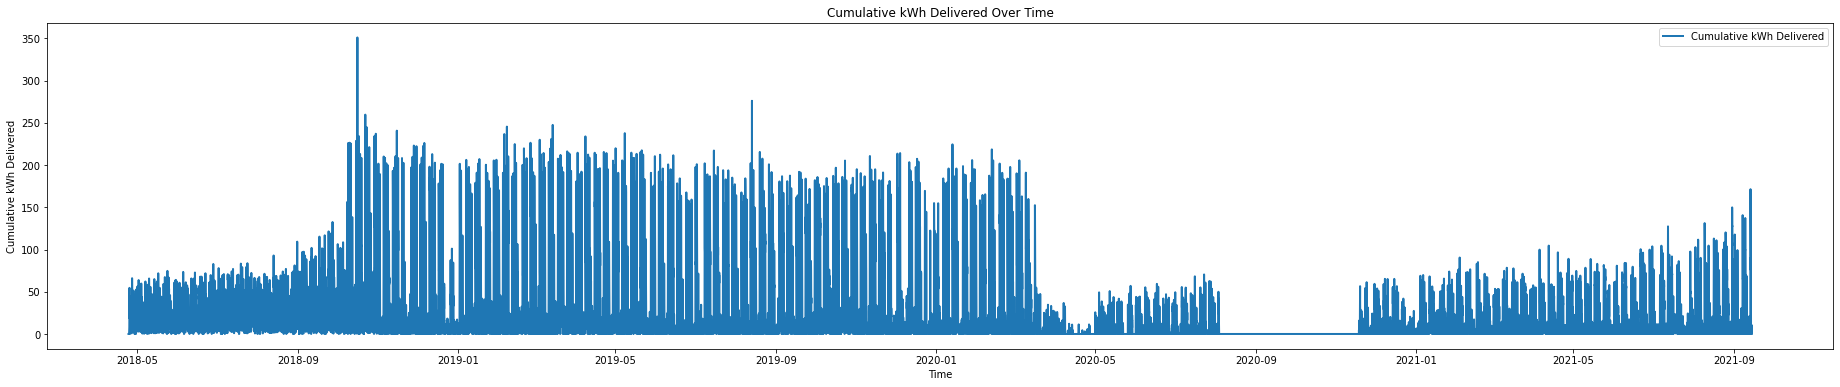

In [50]:
KPI_khW_timestamp_both_sites['hourly_timestamp'] = pd.to_datetime(KPI_khW_timestamp_both_sites['hourly_timestamp'])

grouped_data = KPI_khW_timestamp_both_sites.groupby('hourly_timestamp')['khWdelivered'].sum().reset_index()

plt.figure(figsize=(32, 6))

plt.plot(grouped_data['hourly_timestamp'], grouped_data['khWdelivered'], label='Cumulative kWh Delivered', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time')
plt.legend()

plt.show()

/Users/imkeschwenke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-51-2d205bb5f8e3>:19: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


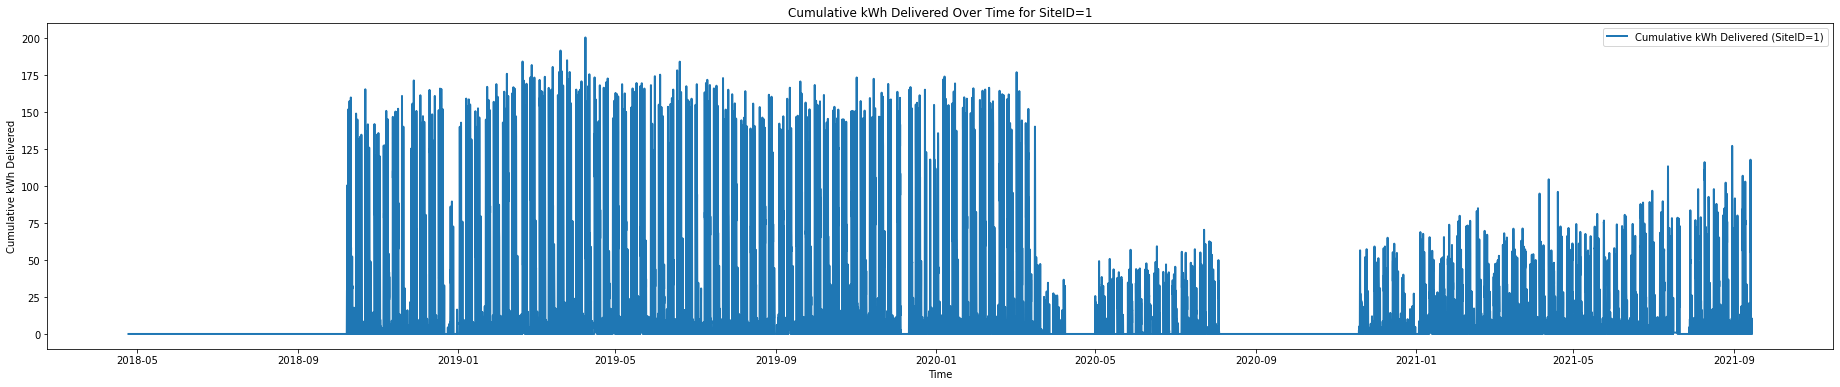

In [51]:
KPI_khW_timestamp_site1 = KPI_khW_timestamp.copy()
KPI_KhW_delivered_site1 = KPI_KhW_delivered.copy()

for index, row in KPI_KhW_delivered_site1.iterrows():

    if row['siteID'] == 1:
        start_time = row['connectionTime']
        end_time = row['endTime']
        khW_delivered = row['kWhDelivered']

 
        mask = (KPI_khW_timestamp_site1['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_site1['hourly_timestamp'] <= end_time)


        hourly_timestamps = KPI_khW_timestamp_site1.loc[mask, 'hourly_timestamp']
        elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

        if not elapsed_time.empty:
            elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()

        proportion = elapsed_time / row['chargingTime'].total_seconds()


        KPI_khW_timestamp_site1.loc[mask, 'khWdelivered'] += proportion * khW_delivered


plt.figure(figsize=(32, 6))
plt.plot(KPI_khW_timestamp_site1['hourly_timestamp'], KPI_khW_timestamp_site1['khWdelivered'], label='Cumulative kWh Delivered (SiteID=1)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time for SiteID=1')
plt.legend()
plt.show()

/Users/imkeschwenke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-52-a578b0b33240>:19: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


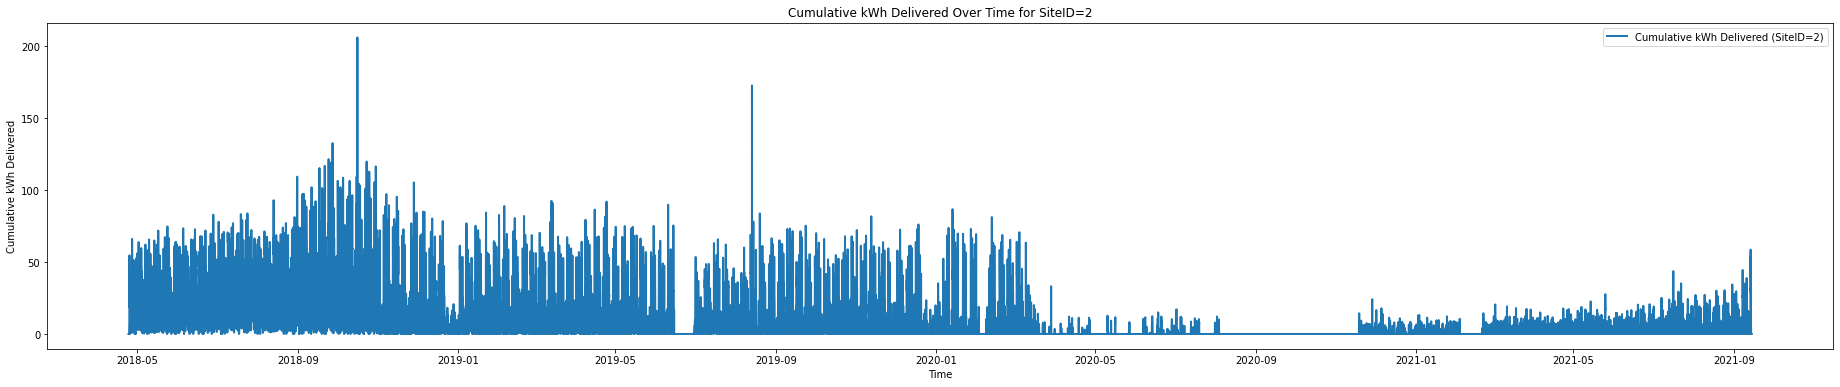

In [52]:
KPI_khW_timestamp_site2 = KPI_khW_timestamp.copy()
KPI_KhW_delivered_site2 = KPI_KhW_delivered.copy()

for index, row in KPI_KhW_delivered_site2.iterrows():
    # Check if siteID is equal to 1
    if row['siteID'] == 2:
        start_time = row['connectionTime']
        end_time = row['endTime']
        khW_delivered = row['kWhDelivered']


        mask = (KPI_khW_timestamp_site2['hourly_timestamp'] >= start_time) & (KPI_khW_timestamp_site2['hourly_timestamp'] <= end_time)

 
        hourly_timestamps = KPI_khW_timestamp_site2.loc[mask, 'hourly_timestamp']
        elapsed_time = (hourly_timestamps - hourly_timestamps.shift(1, fill_value=start_time)).dt.total_seconds()

        if not elapsed_time.empty:
            elapsed_time.iloc[-1] += (end_time - hourly_timestamps.iloc[-1]).total_seconds()


        proportion = elapsed_time / row['chargingTime'].total_seconds()


        KPI_khW_timestamp_site2.loc[mask, 'khWdelivered'] += proportion * khW_delivered

plt.figure(figsize=(32, 6))
plt.plot(KPI_khW_timestamp_site2['hourly_timestamp'], KPI_khW_timestamp_site2['khWdelivered'], label='Cumulative kWh Delivered (SiteID=2)', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Cumulative kWh Delivered')
plt.title('Cumulative kWh Delivered Over Time for SiteID=2')
plt.legend()
plt.show()

In [53]:
KPI_khW_timestamp_site1.rename(columns={'khWdelivered': 'khWdeliveredSite1'}, inplace=True)
KPI_khW_timestamp_site2.rename(columns={'khWdelivered': 'khWdeliveredSite2'}, inplace=True)
KPI_khW_timestamp_both_sites['khWdelivered_site1'] = KPI_khW_timestamp_site1['khWdeliveredSite1']
KPI_khW_timestamp_both_sites['khWdelivered_site2'] = KPI_khW_timestamp_site2['khWdeliveredSite2']

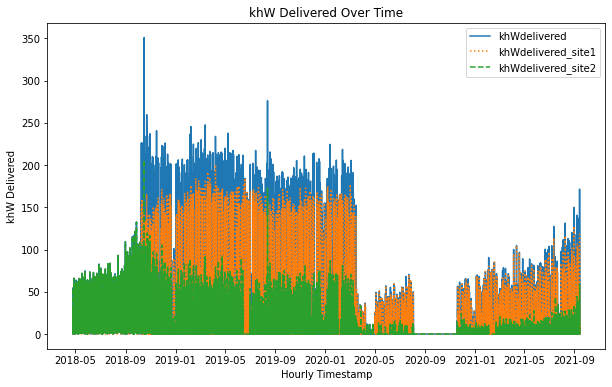

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(KPI_khW_timestamp_both_sites['hourly_timestamp'], KPI_khW_timestamp_both_sites['khWdelivered'], label='khWdelivered')
plt.plot(KPI_khW_timestamp_both_sites['hourly_timestamp'], KPI_khW_timestamp_both_sites['khWdelivered_site1'], label='khWdelivered_site1', linestyle='dotted')
plt.plot(KPI_khW_timestamp_both_sites['hourly_timestamp'], KPI_khW_timestamp_both_sites['khWdelivered_site2'], label='khWdelivered_site2', linestyle='dashed')

plt.xlabel('Hourly Timestamp')
plt.ylabel('khW Delivered')
plt.title('khW Delivered Over Time')
plt.legend()

plt.show()

### This graphs show how much kWh is delivered over the period of whole operation

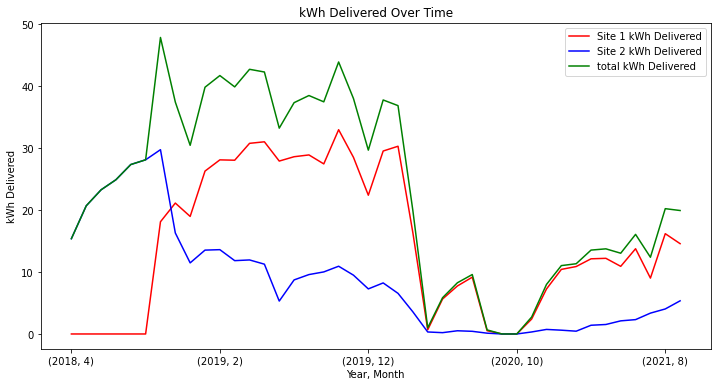

In [55]:
monthly_avg_kWh_site1 = KPI_khW_timestamp_both_sites.groupby([KPI_khW_timestamp_both_sites['year'], KPI_khW_timestamp_both_sites['month']])['khWdelivered_site1'].mean()
monthly_avg_kWh_site2 = KPI_khW_timestamp_both_sites.groupby([KPI_khW_timestamp_both_sites['year'], KPI_khW_timestamp_both_sites['month']])['khWdelivered_site2'].mean()
monthly_avg_kWh = KPI_khW_timestamp_both_sites.groupby([KPI_khW_timestamp_both_sites['year'], KPI_khW_timestamp_both_sites['month']])['khWdelivered'].mean()

plt.figure(figsize=(12, 6))

monthly_avg_kWh_site1.plot(color='red', label='Site 1 kWh Delivered')
monthly_avg_kWh_site2.plot(color='blue', label='Site 2 kWh Delivered')
monthly_avg_kWh.plot(color='green', label='total kWh Delivered')

plt.xlabel('Year, Month')
plt.ylabel('kWh Delivered')
plt.title('kWh Delivered Over Time')

plt.legend()
plt.show()